In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import numpy as np
import sys
from scipy.special import gamma
sys.path.append('..')
from src.metropolis import MetropolisSampler

### Exemplo

#### Log posteriori (função objetivo)

In [8]:
def log_obj(x):
    return (
        ((x[0]-1)*np.log(0.5) + np.log(1-0.5)*(x[1]-1) + 
        (x[0]-1)*np.log(0.2) + np.log(1-0.2)*(x[1]-1) + 
        (x[0]-1)*np.log(0.2) + np.log(1-0.2)*(x[1]-1) + 
        (x[0]-1)*np.log(0.2) + np.log(1-0.2)*(x[1]-1) + 
        (x[0]-1)*np.log(0.2) + np.log(1-0.2)*(x[1]-1) + 
        (x[0]-1)*np.log(0.2) + np.log(1-0.2)*(x[1]-1) + 
        (x[0]-1)*np.log(0.2) + np.log(1-0.2)*(x[1]-1)) - 7*np.log(gamma(x[0])*gamma(x[1])/gamma(x[0]+x[1]))
    )

#### Inferência

Geração de amostras usando MCMC

In [192]:
sampler = MetropolisSampler(log_obj, [1, 1], kernel_sigma = [5, 5], 
                            warmup_iterations = 20000,
                            restrictions=[[0.01, np.inf], [0.01, np.inf]])
sampler.warm()
samples = sampler.sample(20000)

Média amostral das realizações da posteriori

In [193]:
m = np.mean(samples, axis = 0); print(m)
print(m[0]/(m[0]+m[1]))

[ 7.55225862 23.35066788]
0.24438651867396452


Densidade estimada da posteriori

Text(0.5, 1.0, 'Trajetória da cadeia')

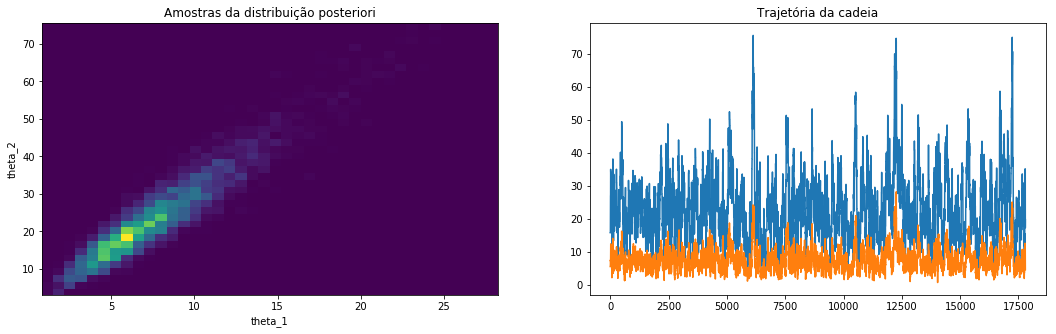

In [194]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)

# Histograma 2d
plt.hist2d(samples[:,0], samples[:,1], bins = [40, 40])[1][0]
plt.title('Amostras da distribuição posteriori')
plt.xlabel('theta_1'); plt.ylabel('theta_2')

# Trace plot
plt.subplot(1, 2, 2)
plt.plot(samples[:, 1])
plt.plot(samples[:, 0])
plt.title('Trajetória da cadeia')